# Galaxies Morphology Classification Using Convolutional Neural Networks

## Model v2

Import required libraries.

In [0]:
import pandas as pd
import os, random, shutil

import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

The data set used is built using the the notebook available in the GitHub repository: https://github.com/nunorc/galaxy-convnet

Set the train and validation directory with the images.

In [0]:
train_dir = 'data/train'
validation_dir = 'data/validation'

Get the total images in the training and validation dataset, this should be around 8044 images for training, and 3450 for validation.

In [3]:
total_train = 0
for c in ['elliptical', 'lenticular', 'spiral']:
  total_train += len(os.listdir(os.path.join(train_dir, c)))
print('Total train:', total_train)

total_validation = 0
for c in ['elliptical', 'lenticular', 'spiral']:
  total_validation += len(os.listdir(os.path.join(validation_dir, c)))
print('Total validation:', total_validation)

Total train: 8044
Total validation: 3450


Set the batch size.

In [0]:
BS = 32

Create the data generator for both sets, but now with image augmentation, where random operations are made on images like random shifts or rotations on each batch, stil do the rescale and set the target size.

In [5]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=25,
                                   width_shift_range=.15,
                                   height_shift_range=.15,
                                   horizontal_flip=True,
                                   zoom_range=0.2)
validation_datagen  = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=BS,
                                                    shuffle=True,
                                                    class_mode='categorical')
validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         target_size=(150,150),
                                                         batch_size=BS,
                                                         shuffle=False,
                                                         class_mode='categorical')

Found 8044 images belonging to 3 classes.
Found 3450 images belonging to 3 classes.


Create the model, using a sequence of convolution and pooling layers, followed by a dropout layer, a fully connected layer, and the last softmax layer.

In [0]:
model = tf.keras.models.Sequential([
    # first convolution layer, input is an 150x150 image x3 colors
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # second convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # third convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # fourth convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # flatten the image pixels
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron fully connected hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

Compile the model to use a categorical cross entropy loss function, and a adam optmizier.

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Train the model for 100 epochs.

In [8]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=total_train/BS,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=total_validation/BS,
                              verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
252/252 [==============================] - 87s 345ms/step - loss: 0.7774 - acc: 0.5812 - val_loss: 0.6395 - val_acc: 0.6684
Epoch 2/100
252/252 [==============================] - 82s 325ms/step - loss: 0.6216 - acc: 0.6663 - val_loss: 0.6258 - val_acc: 0.6583
Epoch 3/100
252/252 [==============================] - 84s 334ms/step - loss: 0.5734 - acc: 0.6984 - val_loss: 0.5245 - val_acc: 0.7188
Epoch 4/100
252/252 [==============================] - 82s 324ms/step - loss: 0.5385 - acc: 0.7184 - val_loss: 0.5071 - val_acc: 0.7522
Epoch 5/100
252/252 [==============================] - 82s 326ms/step - loss: 0.5223 - acc: 0.7335 - val_loss: 0.4794 - val_acc: 0.7606
Epoch 6/100
252/252 [==============================] - 82s 324ms/step - loss: 0.5029 - acc: 0.7505 - val_loss: 0.4744 - val_acc: 0.7632
Epoch 7/100
252/252 [==============================] - 83s 331ms/step - loss: 0.4793 - acc: 0.7670 - val_loss: 0.4271 - val_acc: 0.7930


Build plots for the training and validation accuracy and

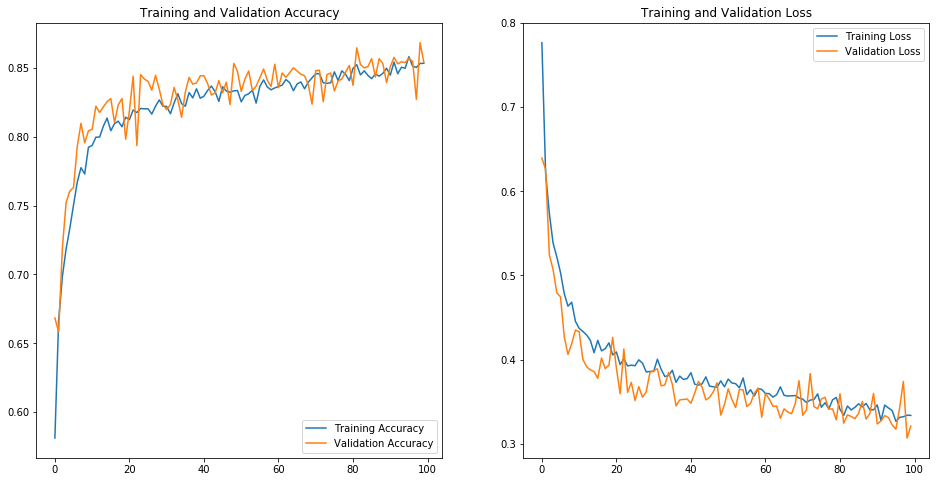

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))  # range for the number of epochs

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./plots-v2.png')
plt.show()

Finally save the model.

In [0]:
model.save('galaxy-convnet-v2.h5')